,SEXO,ID_EDAD,COUNT
18,Hombre,30,1948
13,Hombre,25,1767
15,Hombre,27,1738
14,Hombre,26,1727
16,Hombre,28,1630


,SEXO,ID_EDAD,COUNT
97,Mujer,27,474
96,Mujer,26,448
100,Mujer,30,438
99,Mujer,29,431
98,Mujer,28,430


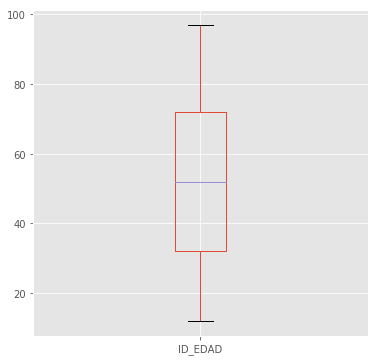

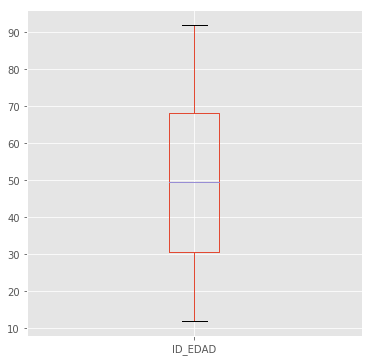

In [89]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

base = pd.read_csv('./data/conjunto_de_datos/atus_anual_2017.csv', delimiter=',')
municipios = pd.read_csv('./data/catalogos/tc_municipio.csv', delimiter=',')

#print(base.info())
#print(municipios.info())

#accidentes_nl = base.query('ID_ENTIDAD == 19')
#municipios_nl = base.query('ID_ENTIDAD == 19')

 
cols = municipios.columns.tolist()
cols = [col.strip() for col in cols]
municipios.columns = cols

accidentes_nl = base.query('ID_ENTIDAD == 19')
municipios_nl = municipios.query('ID_ENTIDAD == 19')
#print(accidentes_nl.info())
#print(municipios.info()) 

#work_df = accidentes_nl.merge(municipios, on='ID_MUNICIPIO', how='left')
work_df = accidentes_nl.merge(municipios_nl, on='ID_MUNICIPIO', how='left')

#print(work_df.groupby(['DIASEMANA']).count()['ID_DIA'].sort_values(ascending=False).head(1))

#print(work_df.groupby(['MES']).count()['ID_DIA'].sort_values(ascending=False).head(1))

#print(work_df.groupby(['TIPACCID']).count()['ID_DIA'].sort_values(ascending=False).head(5))
#work_df.loc[work_df['TIPACCID'].str.startswith('Colisión con vehículo automotor'), 'TIPACCID'] = 'Colisión con vehículo automotor'
#print(work_df.groupby(['TIPACCID']).count()['ID_DIA'].sort_values(ascending=False).head(5))

#print('Total: {0}'.format(work_df.shape))
#print(work_df.query('AUTOMOVIL > 0 and MOTOCICLET > 0').count()['ID_DIA'])
#print(work_df.query('AUTOMOVIL > 0 and BICICLETA > 0').count()['ID_DIA'])
#print(work_df.query('AUTOMOVIL > 0 and MOTOCICLET > 0 and BICICLETA > 0').count()['ID_DIA'])

por_edad = work_df.groupby(['SEXO', 'ID_EDAD']).count()['TIPACCID'].reset_index()
por_edad.columns = ['SEXO', 'ID_EDAD', 'COUNT']
por_edad.sort_values('COUNT', ascending=False).query('ID_EDAD != 99 and SEXO == "Hombre"').head()
por_edad.sort_values('COUNT', ascending=False).query('ID_EDAD != 99 and SEXO == "Mujer"').head()

por_edad.sort_values('ID_EDAD', ascending=True).query('ID_EDAD != 99 and SEXO == "Hombre"').plot(x='COUNT', y='ID_EDAD', kind='box', figsize=(6,6))
por_edad.sort_values('ID_EDAD', ascending=True).query('ID_EDAD != 99 and SEXO == "Mujer"').plot(x='COUNT', y='ID_EDAD', kind='box', figsize=(6,6))